## Cargar Datos

In [1]:
import seaborn as sns

In [4]:
df = sns.load_dataset(name="car_crashes")
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


## Selección de Variables

<AxesSubplot:xlabel='alcohol', ylabel='total'>

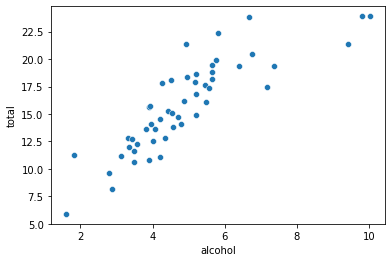

In [5]:
# A mayor alchool, mayor accidente
sns.scatterplot(x='alcohol', y='total', data=df)

## Entrenar el Modelo

In [6]:
explicativas = df[['alcohol']]

In [7]:
objetivo = df['total']

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

In [12]:
model.fit(X=explicativas, y=objetivo)

LinearRegression()

In [13]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.0325063]),
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': 5.857776154826299}

$$
total=5.85+2.03 \cdot alcohol
$$

## Realizar Predicciones

In [15]:
model.predict(X=[[2]])

/home/jamesnoria/sideProjects/regresionLineal/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.92278876])

In [16]:
y_pred = model.predict(X=df[['alcohol']])

In [17]:
df.insert(0, 'pred', y_pred)

In [18]:
df.head()

,pred,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,17.321112,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,15.054867,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,16.443069,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,17.695093,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.686997,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


## Visualizar Modelo

<AxesSubplot:xlabel='alcohol', ylabel='total'>

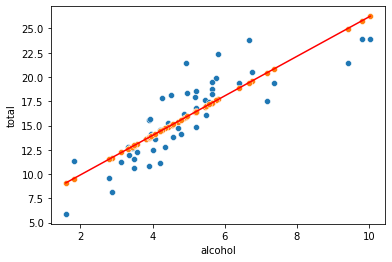

In [20]:
sns.scatterplot(x='alcohol', y='total', data=df)
sns.scatterplot(x='alcohol', y='pred', data=df)
sns.lineplot(x='alcohol', y='pred', data=df, color='red')

## Conclusiones

In [21]:
model.score(X=explicativas, y=objetivo)

0.7269492966665405

Nuestro modelo explica un 72% de la variabilidad original del total de accidentes